In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#tf.__version__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/data/sample_bat_83.csv'
df_83 = pd.read_csv(file_path)
df_83.sort_values(by='acquisition-time', ascending=True, inplace=True)
df_83.head()

,temperature,humidity,acquisition-time
181585,27.0,58.0,2023-04-27T18:49:33.000Z
181584,27.0,57.7,2023-04-27T18:50:34.000Z
181583,27.0,57.9,2023-04-27T18:51:34.000Z
181582,27.0,57.8,2023-04-27T18:52:35.000Z
181581,27.0,57.8,2023-04-27T18:53:36.000Z


In [ ]:
df_83.tail()

,temperature,humidity,acquisition-time
4,17.3,60.2,2024-02-04T01:55:00.000Z
3,17.2,60.1,2024-02-04T02:00:02.000Z
2,17.2,60.0,2024-02-04T02:05:02.000Z
1,17.2,60.6,2024-02-04T02:10:02.000Z
0,17.2,60.5,2024-02-04T02:15:02.000Z


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/data/sample_bat_82.csv'
df_82 = pd.read_csv(file_path)
df_82.sort_values(by='acquisition-time', ascending=True, inplace=True)
df_82.head()

,temperature,humidity,acquisition-time
69555,24.5,70.0,2023-04-27T18:50:30.000Z
69554,24.4,70.3,2023-04-27T18:55:30.000Z
69553,24.4,70.3,2023-04-27T19:00:30.000Z
69552,24.4,70.2,2023-04-27T19:05:30.000Z
69551,24.4,70.5,2023-04-27T19:10:31.000Z


In [ ]:
df_82.tail()

,temperature,humidity,acquisition-time
4,14.7,72.9,2024-02-04T01:56:34.000Z
3,14.6,72.9,2024-02-04T02:01:34.000Z
2,14.6,72.8,2024-02-04T02:06:34.000Z
1,14.6,73.1,2024-02-04T02:11:34.000Z
0,14.6,73.2,2024-02-04T02:16:34.000Z


In [ ]:
combined_df = pd.concat([df_83, df_82], ignore_index=True)

In [ ]:
df_temp = combined_df.copy()
df_temp['acquisition-time'] = pd.to_datetime(df_temp['acquisition-time'])
df_temp['acquisition-time'] = df_temp['acquisition-time'].dt.tz_convert('Asia/Dhaka')
#df_temp['acquisition-time'] = df_temp['acquisition-time'].dt.tz_localize(None)
#df_temp.sort_values(by='acquisition-time', ascending=True, inplace=True)
df_temp.index = df_temp['acquisition-time']

#df_temp.drop(columns=['acquisition-time'], inplace=True)

df_temp.head()

,temperature,humidity,acquisition-time
acquisition-time,,,
2023-04-28 00:49:33+06:00,27.0,58.0,2023-04-28 00:49:33+06:00
2023-04-28 00:50:34+06:00,27.0,57.7,2023-04-28 00:50:34+06:00
2023-04-28 00:51:34+06:00,27.0,57.9,2023-04-28 00:51:34+06:00
2023-04-28 00:52:35+06:00,27.0,57.8,2023-04-28 00:52:35+06:00
2023-04-28 00:53:36+06:00,27.0,57.8,2023-04-28 00:53:36+06:00


In [ ]:
df_temp.tail()

,temperature,humidity,acquisition-time
acquisition-time,,,
2024-02-04 07:56:34+06:00,14.7,72.9,2024-02-04 07:56:34+06:00
2024-02-04 08:01:34+06:00,14.6,72.9,2024-02-04 08:01:34+06:00
2024-02-04 08:06:34+06:00,14.6,72.8,2024-02-04 08:06:34+06:00
2024-02-04 08:11:34+06:00,14.6,73.1,2024-02-04 08:11:34+06:00
2024-02-04 08:16:34+06:00,14.6,73.2,2024-02-04 08:16:34+06:00


In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251142 entries, 2023-04-28 00:49:33+06:00 to 2024-02-04 08:16:34+06:00
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype                     
---  ------            --------------   -----                     
 0   temperature       251142 non-null  float64                   
 1   humidity          251142 non-null  float64                   
 2   acquisition-time  251142 non-null  datetime64[ns, Asia/Dhaka]
dtypes: datetime64[ns, Asia/Dhaka](1), float64(2)
memory usage: 7.7 MB


In [ ]:
df_temp.shape

(251142, 3)

In [ ]:
df_temp.describe()

,temperature,humidity
count,251142.000000,251142.000000
mean,27.081026,64.856050
std,5.814367,9.570939
min,9.400000,17.900000
25%,23.500000,59.800000
50%,29.100000,65.900000
75%,30.900000,71.200000
max,42.600000,91.700000


In [ ]:
df_temp[181584:181800]

,temperature,humidity,acquisition-time
acquisition-time,,,
2024-02-04 08:10:02+06:00,17.2,60.6,2024-02-04 08:10:02+06:00
2024-02-04 08:15:02+06:00,17.2,60.5,2024-02-04 08:15:02+06:00
2023-04-28 00:50:30+06:00,24.5,70.0,2023-04-28 00:50:30+06:00
2023-04-28 00:55:30+06:00,24.4,70.3,2023-04-28 00:55:30+06:00
2023-04-28 01:00:30+06:00,24.4,70.3,2023-04-28 01:00:30+06:00
...,...,...,...
2023-04-29 04:54:54+06:00,27.1,65.5,2023-04-29 04:54:54+06:00
2023-04-29 04:59:55+06:00,27.0,65.7,2023-04-29 04:59:55+06:00
2023-04-29 05:04:56+06:00,27.0,65.7,2023-04-29 05:04:56+06:00


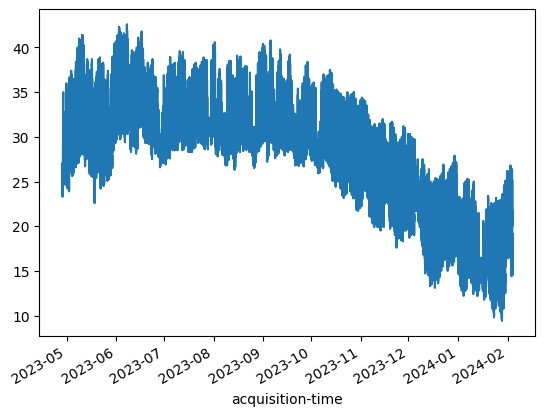

In [ ]:
temp = df_temp['temperature']
temp.plot()
plt.show()

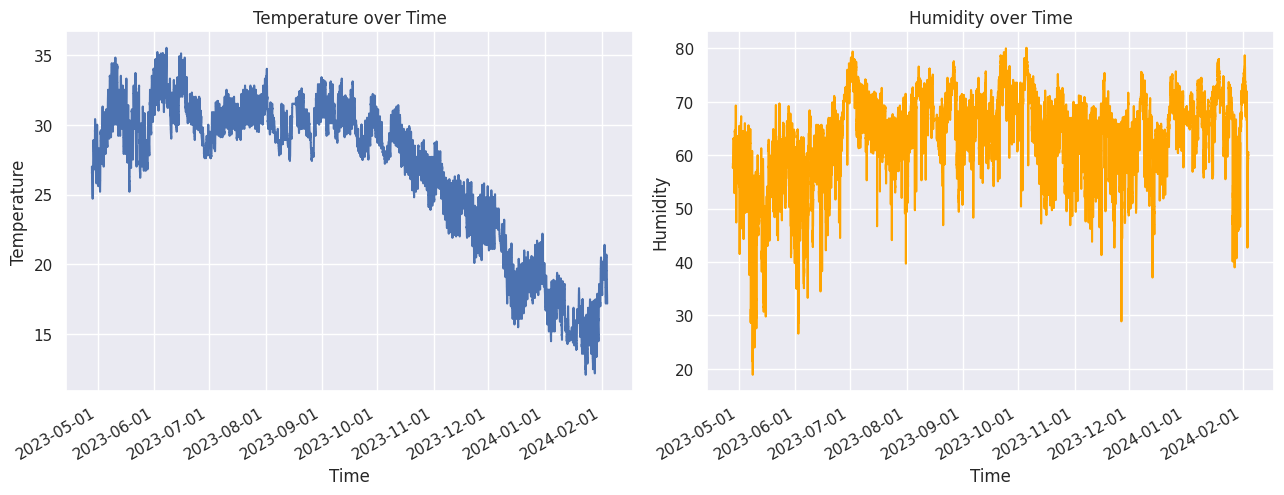

In [ ]:
# Setting plot style
sns.set(style="darkgrid")

# Create a larger figure size to give more room for labels
plt.figure(figsize=(13, 5))

# Temperature plot
plt.subplot(1, 2, 1)
plt.plot(df_temp['acquisition-time'], df_temp['temperature'], label='Temperature')
plt.title('Temperature over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatic interval selection

# Humidity plot
plt.subplot(1, 2, 2)
plt.plot(df_temp['acquisition-time'], df_temp['humidity'], label='Humidity', color='orange')
plt.title('Humidity over Time')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatic interval selection

# Automatically adjust subplot params for a better fit
plt.tight_layout()

# Further improve the fit of the labels
plt.subplots_adjust(bottom=0.2)  # Adjust bottom spacing if needed

# Auto-format date labels
plt.gcf().autofmt_xdate()

plt.show()

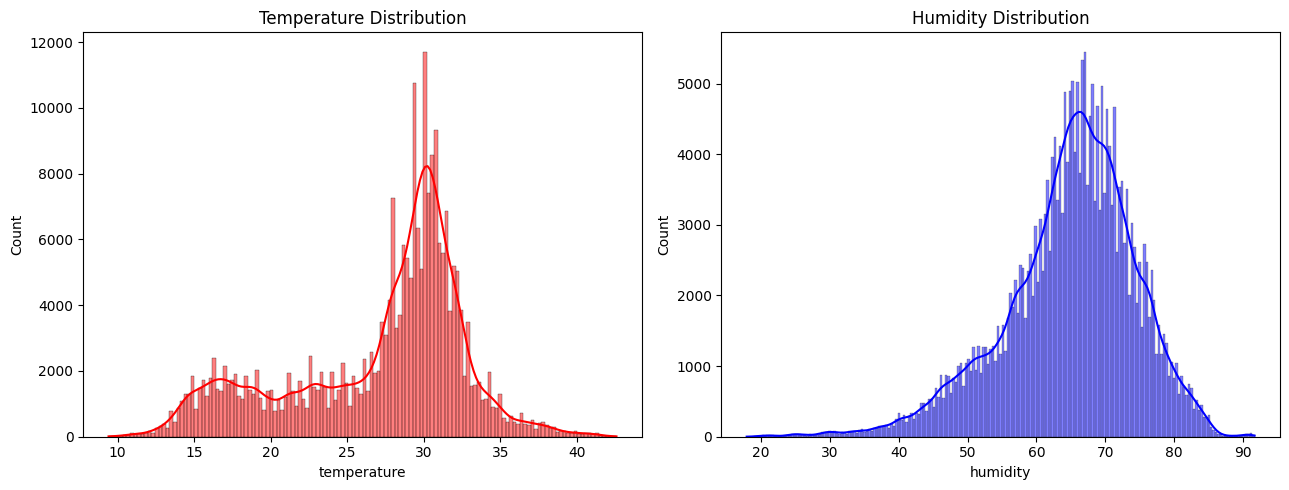

In [ ]:
# Plotting the distribution of temperature and humidity
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_temp['temperature'], kde=True, color='red')
plt.title('Temperature Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_temp['humidity'], kde=True, color='blue')
plt.title('Humidity Distribution')

plt.tight_layout()
plt.show()

In [ ]:
#df_temp = pd.DataFrame({'Temperature':temp})
df_temp['timestamp'] = df_temp.index.map(pd.Timestamp.timestamp)
df_temp

,temperature,humidity,acquisition-time,timestamp
acquisition-time,,,,
2023-04-28 00:49:33+06:00,27.0,58.0,2023-04-28 00:49:33+06:00,1.682621e+09
2023-04-28 00:50:34+06:00,27.0,57.7,2023-04-28 00:50:34+06:00,1.682621e+09
2023-04-28 00:51:34+06:00,27.0,57.9,2023-04-28 00:51:34+06:00,1.682621e+09
2023-04-28 00:52:35+06:00,27.0,57.8,2023-04-28 00:52:35+06:00,1.682622e+09
2023-04-28 00:53:36+06:00,27.0,57.8,2023-04-28 00:53:36+06:00,1.682622e+09
...,...,...,...,...
2024-02-04 07:56:34+06:00,14.7,72.9,2024-02-04 07:56:34+06:00,1.707012e+09
2024-02-04 08:01:34+06:00,14.6,72.9,2024-02-04 08:01:34+06:00,1.707012e+09
2024-02-04 08:06:34+06:00,14.6,72.8,2024-02-04 08:06:34+06:00,1.707012e+09


In [ ]:
df_temp.drop(columns=['acquisition-time'], inplace=True)
df_temp

,temperature,humidity,timestamp
acquisition-time,,,
2023-04-28 00:49:33+06:00,27.0,58.0,1.682621e+09
2023-04-28 00:50:34+06:00,27.0,57.7,1.682621e+09
2023-04-28 00:51:34+06:00,27.0,57.9,1.682621e+09
2023-04-28 00:52:35+06:00,27.0,57.8,1.682622e+09
2023-04-28 00:53:36+06:00,27.0,57.8,1.682622e+09
...,...,...,...
2024-02-04 07:56:34+06:00,14.7,72.9,1.707012e+09
2024-02-04 08:01:34+06:00,14.6,72.9,1.707012e+09
2024-02-04 08:06:34+06:00,14.6,72.8,1.707012e+09


In [ ]:
#df_temp.to_csv('/content/drive/My Drive/Colab Notebooks/data/exported_modified_df_83.csv', index=False)

In [ ]:
day = 60*60*24
year = 365.2425*day

df_temp['day_sin'] = np.sin(df_temp['timestamp'] * (2* np.pi / day))
df_temp['day_cos'] = np.cos(df_temp['timestamp'] * (2 * np.pi / day))
df_temp['year_sin'] = np.sin(df_temp['timestamp'] * (2 * np.pi / year))
df_temp['year_cos'] = np.cos(df_temp['timestamp'] * (2 * np.pi / year))

df_temp = df_temp.drop('timestamp', axis=1)

df_temp.head()

,temperature,humidity,day_sin,day_cos,year_sin,year_cos
acquisition-time,,,,,,
2023-04-28 00:49:33+06:00,27.0,58.0,-0.976719,0.214522,0.904429,-0.426624
2023-04-28 00:50:34+06:00,27.0,57.7,-0.975758,0.218853,0.904424,-0.426635
2023-04-28 00:51:34+06:00,27.0,57.9,-0.974794,0.223108,0.904419,-0.426646
2023-04-28 00:52:35+06:00,27.0,57.8,-0.973794,0.227430,0.904413,-0.426657
2023-04-28 00:53:36+06:00,27.0,57.8,-0.972776,0.231748,0.904408,-0.426668


In [ ]:
# df_temp['datetime'] = pd.to_datetime(df_temp['timestamp'], unit='s')

# # Plotting only for the daily cycle

# # Adjusting the subset for daily cycle visualization (a few days)
# daily_data = df_temp[(df_temp['datetime'] > '2023-05-01') & (df_temp['datetime'] < '2023-05-31')]

# # Plotting
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# fig.suptitle('Daily Cycle Sine and Cosine Transformations')

# # Day Sine Plot
# axes[0].plot(daily_data['datetime'], daily_data['day_sin'])
# axes[0].set_title('Day Sine (Few Days)')
# axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# # Day Cosine Plot
# axes[1].plot(daily_data['datetime'], daily_data['day_cos'])
# axes[1].set_title('Day Cosine (Few Days)')
# axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()



In [ ]:
def to_sequences(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X, y = to_sequences(df_temp, 5)
X.shape, y.shape

((251137, 5, 6), (251137, 2))

In [ ]:
total_rows = df_temp.shape[0]

# Calculate the number of rows for each split
# train_rows = int(total_rows * 0.70)
# val_rows = int(total_rows * 0.15)
# test_rows = total_rows - train_rows - val_rows

# X_train, y_train = X[:train_rows], y[:train_rows]
# X_val, y_val = X[train_rows:train_rows+val_rows], y[train_rows:train_rows+val_rows]
# X_test, y_test = X[train_rows+val_rows:], y[train_rows+val_rows:]
# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

X_train, y_train = X[:181586], y[:181586]
X_test, y_test = X[181586:216000], y[181586:216000]
X_val, y_val = X[216000:], y[216000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((181586, 5, 6),
 (181586, 2),
 (35137, 5, 6),
 (35137, 2),
 (34414, 5, 6),
 (34414, 2))

In [ ]:
temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

hum_training_mean = np.mean(X_train[:, :, 1])
hum_training_std = np.std(X_train[:, :, 1])


def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  X[:, :, 1] = (X[:, :, 1] - hum_training_mean) / hum_training_std

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - temp_training_mean) / temp_training_std
  y[:, 1] = (y[:, 1] - hum_training_mean) / hum_training_std
  return y

preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

array([[-0.51156852,  0.77992601],
       [-0.51156852,  0.77992601],
       [-0.51156852,  0.80534519],
       ...,
       [ 0.62149898,  0.91973146],
       [ 0.64007386,  0.8816027 ],
       [ 0.65864873,  0.83076436]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:

#import tensorflow
#from tensorflow import keras
#from keras import layers, models, optimizers, losses, metrics, callbacks

# Define the model
model = Sequential([
    InputLayer((5, 6)),
    #LSTM(100, dropout=0.2),
    LSTM(50, return_sequences=True),
    LSTM(100, dropout=0.2),
    #Flatten(),
    #Dense(256, activation='relu', input_dim=5),
    #Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(2, activation='linear')

    #l1 and l2 regularization to be added

])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             11400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense_12 (Dense)            (None, 128)               12928     
                                                                 
 dense_13 (Dense)            (None, 2)                 258       
                                                                 
Total params: 84986 (331.98 KB)
Trainable params: 84986 (331.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('lstm_50_100_dense_128_w_5/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
#Do not run this line always; Read the code first
# Run this cell when you want to import a model and continue training for more epochs

from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/models/model_with_128_dense/')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 64)            18176     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 35074 (137.01 KB)
Trainable params: 35074 (137.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp])

Epoch 1/30
5675/5675 [==============================] - 70s 12ms/step - loss: 0.0251 - root_mean_squared_error: 0.1585 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1620
Epoch 2/30
5675/5675 [==============================] - 70s 12ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1549
Epoch 3/30
5675/5675 [==============================] - 65s 11ms/step - loss: 0.0045 - root_mean_squared_error: 0.0670 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1511
Epoch 4/30
5675/5675 [==============================] - 79s 14ms/step - loss: 0.0041 - root_mean_squared_error: 0.0640 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1383
Epoch 5/30
5675/5675 [==============================] - 81s 14ms/step - loss: 0.0038 - root_mean_squared_error: 0.0612 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1318
Epoch 6/30
5675/5675 [==============================] - 65s 12ms/step - loss: 0.0035 - root_mean_squared_error: 0.0590 -

KeyboardInterrupt: 

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
3973/3973 [==============================] - 35s 9ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.1440 - val_root_mean_squared_error: 0.3795
Epoch 2/10
3973/3973 [==============================] - 34s 8ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.1398 - val_root_mean_squared_error: 0.3739
Epoch 3/10
3973/3973 [==============================] - 40s 10ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.1239 - val_root_mean_squared_error: 0.3520
Epoch 4/10
3973/3973 [==============================] - 36s 9ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.1387 - val_root_mean_squared_error: 0.3725
Epoch 5/10
3973/3973 [==============================] - 36s 9ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.1326 - val_root_mean_squared_error: 0.3641
Epoch 6/10
3973/3973 [==============================] - 37s 9ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_

In [ ]:
from tensorflow.keras.models import load_model

# Load the best-performing model
best_model = load_model('lstm_50_100_dense_128_w_5/')

# Export the model to the SavedModel format for production
best_model.save('lstm_50_100_dense_128_w_5')
best_model.save('lstm_50_100_dense_128_w_5.h5')  # HDF5 format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Run this cell if you want to predict from a previously exported model at gdrive
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/My Drive/Colab Notebooks/models/model_32_lstm_first/')

In [ ]:
!cp -r '/content/lstm_50_100_dense_128_w_5' '/content/drive/My Drive/Colab Notebooks/models/'
!cp -r '/content/lstm_50_100_dense_128_w_5.h5' '/content/drive/My Drive/Colab Notebooks/models/'

In [ ]:
def plot_predictions(model, X, y, start=0, end=1000):
    predictions = model.predict(X)
    temp_preds, hum_preds = predictions[:, 0], predictions[:, 1]
    temp_actuals, hum_actuals = y[:, 0], y[:, 1]

    df = pd.DataFrame(data={
        'Temperature Predictions': temp_preds,
        'Temperature Actuals': temp_actuals,
        'Humidity Predictions': hum_preds,
        'Humidity Actuals': hum_actuals
    })

    plt.plot(df['Temperature Predictions'][start:end], label='Temperature Predictions')
    plt.plot(df['Temperature Actuals'][start:end], label='Temperature Actuals')
    plt.plot(df['Humidity Predictions'][start:end], label='Humidity Predictions')
    plt.plot(df['Humidity Actuals'][start:end], label='Humidity Actuals')

    # Add a legend to indicate which line is which
    plt.legend()

    # Optionally, add titles and labels for clarity
    plt.title('Predictions vs Actuals')
    plt.xlabel('Index')
    plt.ylabel('Values')

    plt.show()  # Show the plot

    return df[start:end]

1076/1076 [==============================] - 4s 3ms/step


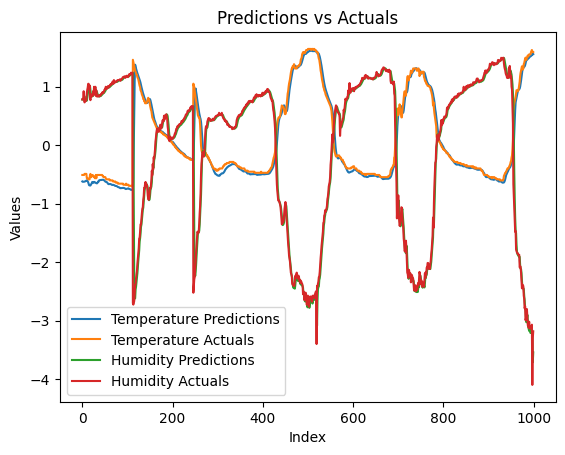

,Temperature Predictions,Temperature Actuals,Humidity Predictions,Humidity Actuals
0,-0.622754,-0.511569,0.777807,0.779926
1,-0.628607,-0.511569,0.778780,0.779926
2,-0.628185,-0.511569,0.776646,0.805345
3,-0.627725,-0.511569,0.785214,0.919731
4,-0.625970,-0.511569,0.836780,0.805345
...,...,...,...,...
995,1.528844,1.605967,-3.209457,-3.096498
996,1.537400,1.624542,-3.195415,-3.071079
997,1.550858,1.605967,-3.169389,-4.100555
998,1.580233,1.587393,-3.713656,-3.299851


In [ ]:
plot_predictions(best_model, X_test, y_test)

In [ ]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std) + temp_training_mean
  return arr

def postprocess_hum(arr):
  arr = (arr*hum_training_std) + hum_training_mean
  return arr

In [ ]:
def plot_predictions(model, X, y, start=0, end=1000):
  predictions = model.predict(X)
  temp_preds, hum_preds = postprocess_temp(predictions[:, 0]), postprocess_hum(predictions[:, 1])
  temp_actuals, hum_actuals = postprocess_temp(y[:, 0]), postprocess_hum(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Humidity Predictions': hum_preds,
                          'Humidity Actuals': hum_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end], label='T_Pred')
  plt.plot(df['Temperature Actuals'][start:end], label='T_Act')
  plt.plot(df['Humidity Predictions'][start:end], label='H_Pred')
  plt.plot(df['Humidity Actuals'][start:end], label='H_Act')
  plt.legend()

  return df[start:end]

1076/1076 [==============================] - 5s 4ms/step


,Temperature Predictions,Temperature Actuals,Humidity Predictions,Humidity Actuals
0,23.801418,24.4,70.283325,70.3
1,23.769909,24.4,70.290985,70.3
2,23.772181,24.4,70.274193,70.5
3,23.774656,24.4,70.341606,71.4
4,23.784105,24.4,70.747330,70.5
...,...,...,...,...
995,35.384800,35.8,38.911232,39.8
996,35.430859,35.9,39.021706,40.0
997,35.503315,35.8,39.226490,31.9
998,35.661457,35.7,34.944153,38.2


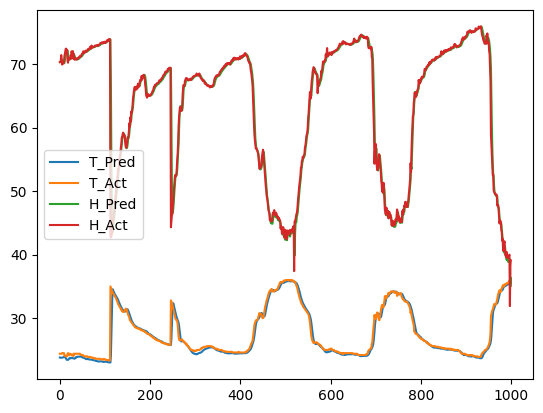

In [ ]:
post_processed_df = plot_predictions(best_model, X_test, y_test)
post_processed_df

In [ ]:
post_processed_df.to_csv('/content/drive/My Drive/Colab Notebooks/data/lstm_50_100_dense_128_w_5.csv', index=False)

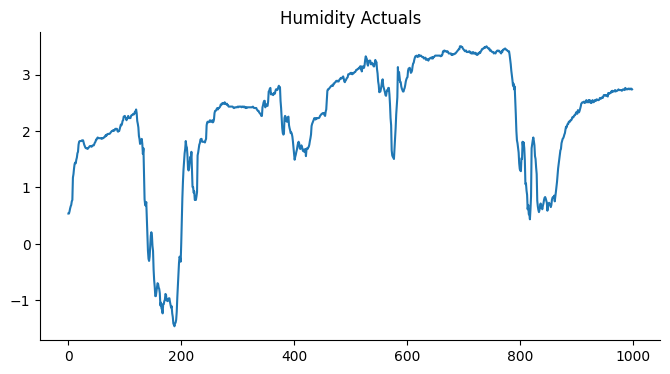

In [ ]:
# @title Humidity Actuals

from matplotlib import pyplot as plt
post_processed_df['Humidity Actuals'].plot(kind='line', figsize=(8, 4), title='Humidity Actuals')
plt.gca().spines[['top', 'right']].set_visible(False)

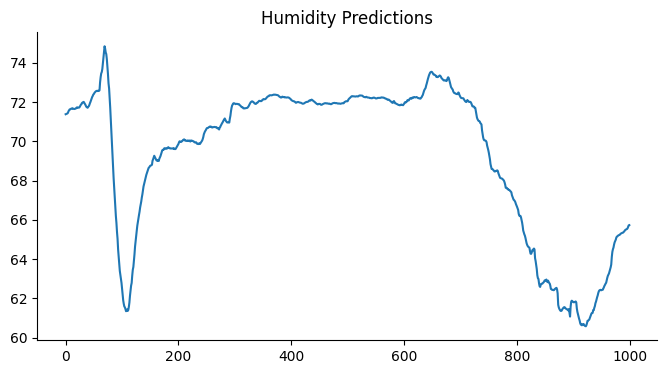

In [ ]:
# @title Humidity Predictions

from matplotlib import pyplot as plt
post_processed_df['Humidity Predictions'].plot(kind='line', figsize=(8, 4), title='Humidity Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

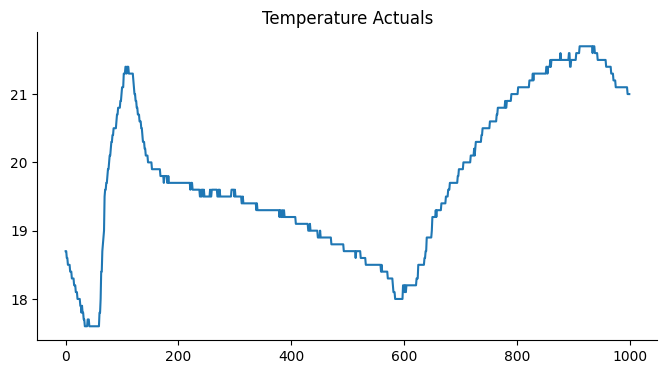

In [ ]:
# @title Temperature Actuals

from matplotlib import pyplot as plt
post_processed_df['Temperature Actuals'].plot(kind='line', figsize=(8, 4), title='Temperature Actuals')
plt.gca().spines[['top', 'right']].set_visible(False)

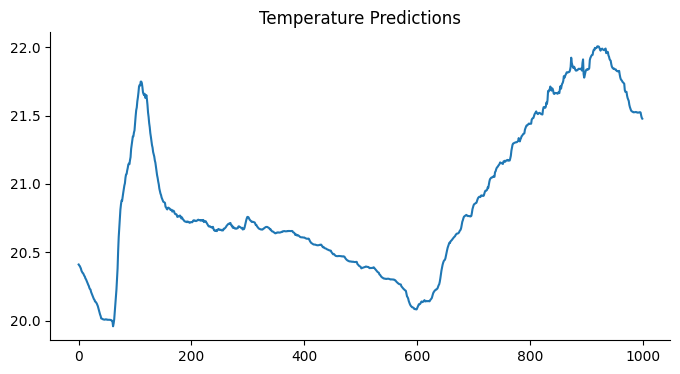

In [ ]:
# @title Temperature Predictions

from matplotlib import pyplot as plt
post_processed_df['Temperature Predictions'].plot(kind='line', figsize=(8, 4), title='Temperature Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

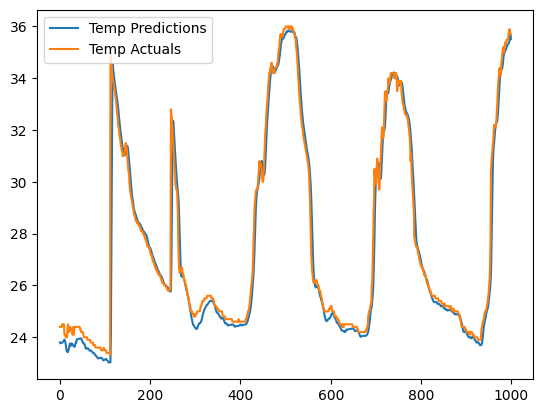

In [ ]:
start, end = 0, 1000
plt.plot(post_processed_df['Temperature Predictions'][start:end], label='Temp Predictions')
plt.plot(post_processed_df['Temperature Actuals'][start:end], label='Temp Actuals')
plt.legend()

plt.show()


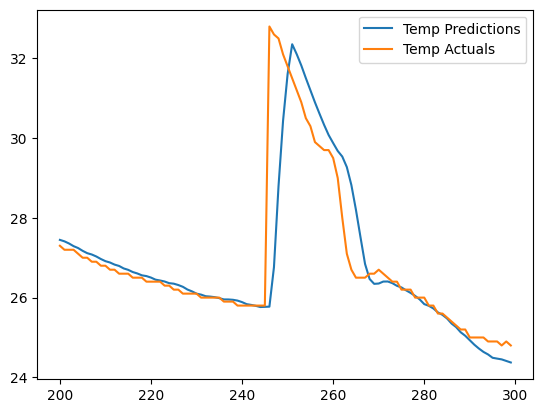

In [ ]:
start, end = 200, 300
plt.plot(post_processed_df['Temperature Predictions'][start:end], label='Temp Predictions')
plt.plot(post_processed_df['Temperature Actuals'][start:end], label='Temp Actuals')
plt.legend()

plt.show()

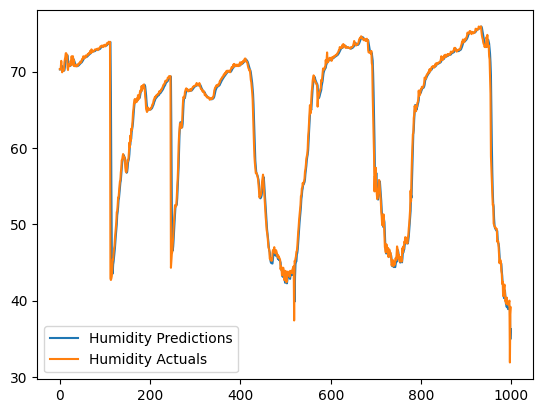

In [ ]:
#plt.plot(post_processed_df['Humidity Predictions'][start:end])
#plt.plot(post_processed_df['Humidity Actuals'][start:end])


plt.plot(post_processed_df['Humidity Predictions'][start:end], label='Humidity Predictions')
plt.plot(post_processed_df['Humidity Actuals'][start:end], label='Humidity Actuals')
plt.legend()
plt.show()

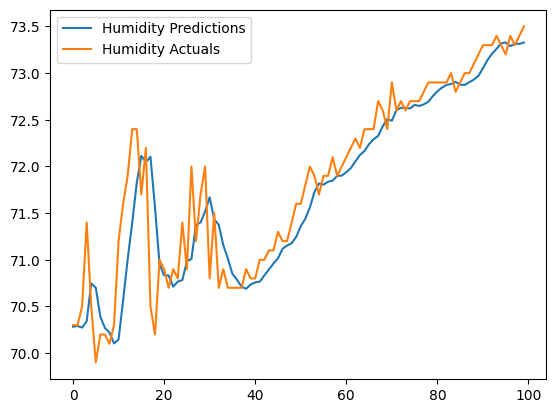

In [ ]:
start, end = 0, 100
plt.plot(post_processed_df['Humidity Predictions'][start:end], label='Humidity Predictions')
plt.plot(post_processed_df['Humidity Actuals'][start:end], label='Humidity Actuals')
plt.legend()
plt.show()